# Assignment 1.1: Exploring WS and BA models

## Did you really read the text? 

### 1. What's the problem with random networks as a model for real-world networks according to the argument in section 3.5 (near the end)?

As explained in section 3.5, random networks have the property that in large networks, most of the nodes have a degree relatively close to k. This property clearly does not align with real-world networks, where we have individuals that are highly popular (having more than k connections) and some others with a number of connections far behind k.

### 2. List the four regimes that characterize random networks as a function of  ⟨k⟩
 

We can define 4 regimes according to ⟨k⟩:

1. Subcritical Regime:  0 ‹ ‹k› ‹ 1 (p ‹ 1/N).

    When k = 0, the network has N isolated nodes. By increasing k, we start adding links to the networks, but given that k < 1, the number of links in this network is still very small, as it can be seen in (b) in the image at the bottom. At this point there is no clear giant component.

2. Critical Point: ‹k› = 1 (p = 1/N)

    At this point, most of the nodes are still part of small components (c in the image below). Although a giant component does not yet exist, the size of the largest component increases sharply in absolute terms. However, its relative size with respect to the whole network is still zero.


3. Supercritical Regime: ‹k› › 1 (p › 1/N)

    As seen in (d), this regime starts connecting more isolated nodes. As we move further from the critical regime, more and more nodes get connected to the giant component. This regime ends when all isolated nodes are connected to the giant component.

4. Connected Regime: ‹k› › lnN (p › lnN/N)

    At this threshold, with high probability, the network becomes connected (all nodes belong to a single component). This transition depends on N (point e).


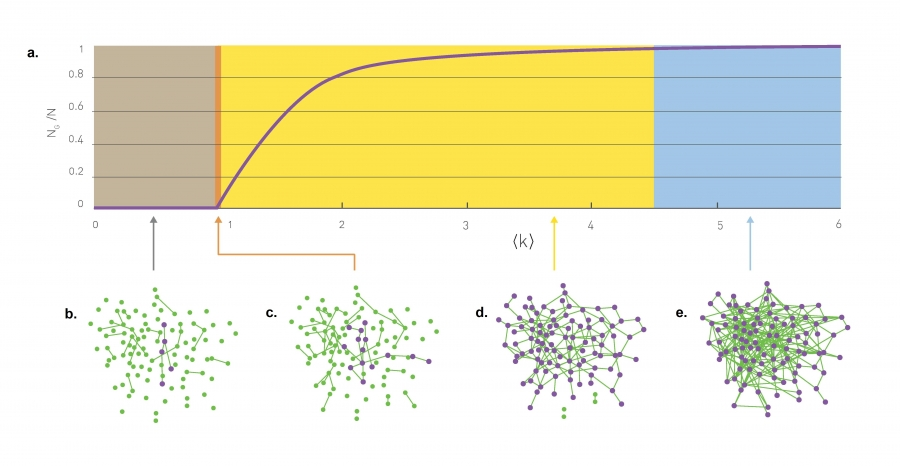

### 3. According to the book, why is it a problem for random networks (in terms of being a model for real-world networks) that the degree-dependent clustering  C(k) decreases as a function of  k in real-world networks?

In real-world networks, the clustering coefficient C(k) decreases as a function of node degree: high-degree nodes have lower clustering than low-degree ones. Random networks, however, predict a clustering coefficient that is independent of degree and instead depends only on system size. This discrepancy is a problem because it shows that random networks fail to capture the degree-dependent clustering structure observed in real networks.

## WS edition

In [1]:
import networkx as nx

### 1

In [2]:
def create_ws_graph_and_calculate_aspl(n, k, p):
    graph = nx.watts_strogatz_graph(n=n, k=k, p=p)
    aspl = nx.average_shortest_path_length(graph)
    return aspl

In [3]:
for p in [0, 0.01, 1]:
    aspl = create_ws_graph_and_calculate_aspl(n=1000, k=10, p=p)
    print(f"p={p}: ASPL={aspl}")

p=0: ASPL=50.450450450450454
p=0.01: ASPL=9.134332332332333
p=1: ASPL=3.2708228228228227


### 2

As p→1, the Watts–Strogatz network becomes essentially a random graph. In this case, the average shortest path length becomes very small, much shorter than in the lattice case.

### 3

In [12]:
import random
import matplotlib.pyplot as plt
import numpy as np

p_aspl = []
n=500
k=4
apl_random_graphs = np.round(np.log(n) / np.log(k),2)  # Approximation for random graphs
print("Average Shortest Path Length approximation for random graphs:", apl_random_graphs)

probs = np.arange(0.1, 1.01, 0.05)
closest_value_to_apl = None
min_diff = float('inf')
for prob in probs:
    aspl = create_ws_graph_and_calculate_aspl(n=n, k=k, p=prob)
    p_aspl.append((prob, aspl))
    if abs(aspl - apl_random_graphs) < min_diff:
        min_diff = abs(aspl - apl_random_graphs)
        closest_value_to_apl = (prob, aspl)
print("Closest value to apl_random_graphs:", np.round(closest_value_to_apl[1],2), "with p =", np.round(closest_value_to_apl[0],2))

Average Shortest Path Length approximation for random graphs: 4.48
Closest value to apl_random_graphs: 4.73 with p = 0.95


### 4

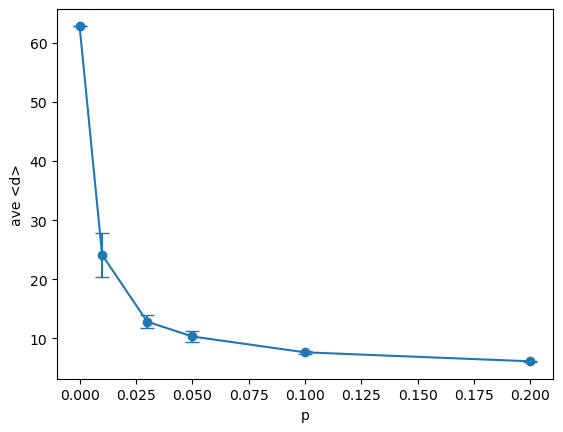

In [5]:
N = 500
k = 4
p_values = [0,0.01,0.03,0.05,0.1,0.2]
avg_dist = []
std_dev = []

for p in p_values:
    total_aspl = 0
    aspl_values = []
    for i in range(50):
        aspl = create_ws_graph_and_calculate_aspl(n=N, k=k, p=p)
        total_aspl += aspl
        aspl_values.append(aspl)
    avg_dist.append(total_aspl / 50)
    std_dev.append(np.std(aspl_values))

plt.errorbar(p_values, avg_dist, yerr=std_dev, marker='o', capsize=5)
plt.xlabel('p')
plt.ylabel('ave <d>')
plt.show()

### 5

Caption: 

Average shortest path length ⟨d⟩ versus rewiring probability p for Watts–Strogatz networks with N = 500 nodes and average degree ⟨k⟩ = 4. Each point shows the mean ⟨d⟩ over 50  network realizations, and the error bars indicate the standard deviation. The plot illustrates that even a small p dramatically reduces the average path length.

## BA Edition

### 1. What are the three slope dependent regimes of complex networks with power-law degree distributions? Briefly describe each one.

There are three slope dependent regimes of complex networks with power-law distributions:
1. Anomalous Regime (γ≤ 2)

    In this regime, the exponent 1/(γ− 1) is larger than one, which implies that the largest hub grow faster than the size of the network. This would mean that a hub needs more links than there are nodes, which is impossible. Because of this, large networks in this regime cannot really exist.

2. Scale-Free Regime (2 ‹ γ ‹ 3)

    In Scale-Free regimes, the average degree is normal, but the variation in degree is huge. Some nodes become very large hubs, which make the network “ultra-small,” meaning that distances between nodes grow very slowly even as the network gets bigger. 

3. Random Network Regime (γ › 3)

    In here, both mean and variance are finite. Hubs are not very big, so the network looks and behaves much like a random network. In practice it is hard to tell such networks apart from random ones unless the network is extremely large.

### 2. What are the three regimes we find in non-linear preferential attachement?

1. Sublinear Preferential Attachment (0 < α < 1)

    New nodes prefer to connect to nodes with more links, but the preference is weak. Hubs exist, but they grow slowly, and the network is fairly balanced; the degree distribution is a stretched exponential, not a power law.

2. Linear Regime (α=1)

    New nodes attach to existing nodes exactly in proportion to their degree. This produces a scale-free network, where some nodes become hubs, but many smaller nodes coexist, and the degree distribution follows a power law.

3. Superlinear Regime (α > 1)

    High-degree nodes attract links much faster than lower-degree nodes. Eventually, a single hub dominates the network, forming a star-like structure where most nodes connect to the same hub.

### Graph Process

1. In order to create our own Barabasi-Albert model, we will first start by creating a graph with only one link

In [6]:
# Creation of a graph with one link
G = nx.Graph()
G.add_edge(0, 1)

2. We create a custom function adds a new node to the graph, connecting it to an existing node according to their degree.
First, we get a list with the edges of the graph and we flatten it to just store the nodes. The amount of times a node is present in the list, represents the probability of connecting to that node.

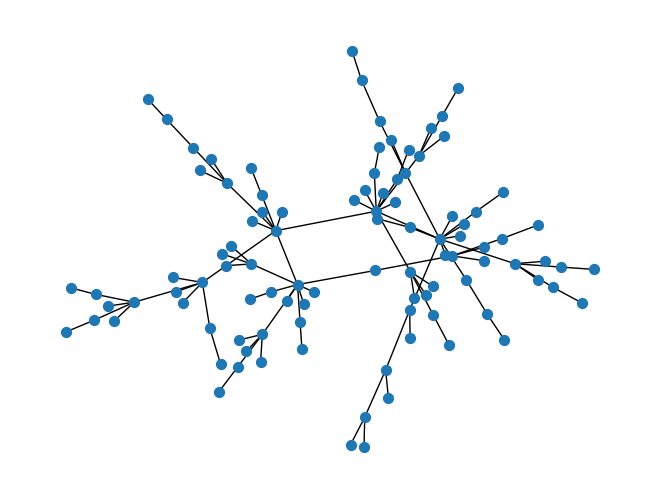

In [ ]:
# Function to add a new node connected to an existing node according to their degree.
def add_node(G):
    """ Adds a new node to the graph G and connects it to an existing node chosen with probability proportional to its degree.
    """
    new_node = len(G.nodes)
    edges = list(G.edges)
    flat_edges = [node for edge in edges for node in edge]
    chosen_node = random.choices(flat_edges)[0]
    G.add_edge(new_node, chosen_node)
    return G

for _ in range(98):
    G = add_node(G)

3. We plot the network

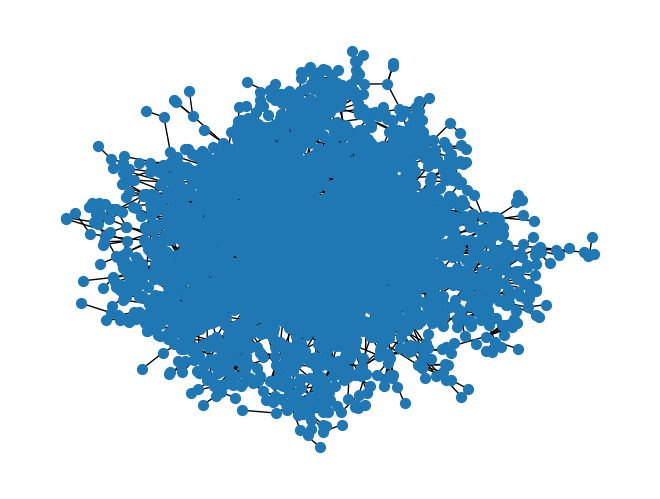

In [13]:
nx.draw(G, with_labels=False, node_size=50)

4. We add more nodes until we have a graph with 5000 nodes

In [8]:
#we add 4900 more nodes to have a total of 5000 nodes
for i in range(4900):
    G = add_node(G)

5. We calculate the min and max degree of the graph

In [9]:
print(f'The maximum degree in the graph is {max(dict(G.degree).values())}, and the minimum degree is {min(dict(G.degree).values())}.')

The maximum degree in the graph is 88, and the minimum degree is 1.


6. Finally, we bin the degree distribution and we generate a plot in linear scale and log-log scale

In [10]:
# now we bin the degrees.
bins = np.histogram(list(dict(G.degree).values()), bins=range(1, max(dict(G.degree).values()) + 2))

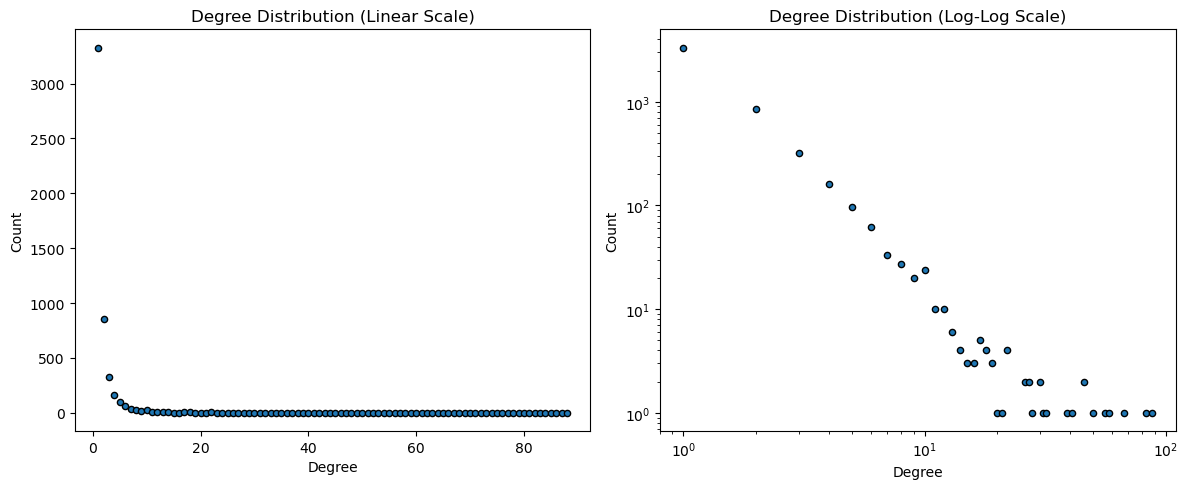

In [11]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(bins[1][:-1], bins[0], s=20, edgecolors='black')
plt.xlabel('Degree')
plt.ylabel('Count')
plt.title('Degree Distribution (Linear Scale)')
plt.subplot(1, 2, 2)
plt.scatter(bins[1][:-1], bins[0], s=20, edgecolors='black')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Degree')
plt.ylabel('Count')
plt.title('Degree Distribution (Log-Log Scale)')
plt.tight_layout()
plt.show()